In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
usersfp = 'takehome_users.csv'
usagefp = 'takehome_user_engagement.csv'

users = pd.read_csv(usersfp, encoding = "ISO-8859-1")
usage = pd.read_csv(usagefp, encoding = "ISO-8859-1")

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
usage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
usage.user_id.nunique()

8823

In [6]:
min(usage.time_stamp), max(usage.time_stamp)

('2012-05-31 08:20:06', '2014-06-06 14:58:50')

In [7]:
usage.time_stamp = pd.to_datetime(usage.time_stamp)

In [8]:
usage.time_stamp = usage.time_stamp.dt.floor("D")

In [9]:
usage.head()

,time_stamp,user_id,visited
0,2014-04-22,1,1
1,2013-11-15,2,1
2,2013-11-29,2,1
3,2013-12-09,2,1
4,2013-12-25,2,1


In [10]:
len(usage)

207917

In [11]:
len(usage.drop_duplicates(subset=['time_stamp','user_id']))

207917

In [12]:
adopted = []
for user in usage.user_id.unique():
    df = usage[usage.user_id == user].set_index('time_stamp')
    if max(df['visited'].rolling('7d').count()) >= 3:
        adopted.append(user)

In [13]:
len(adopted)

1602

In [14]:
users['adopted'] = users['object_id'].isin(adopted)

In [15]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


<AxesSubplot:xlabel='opted_in_to_mailing_list', ylabel='count'>

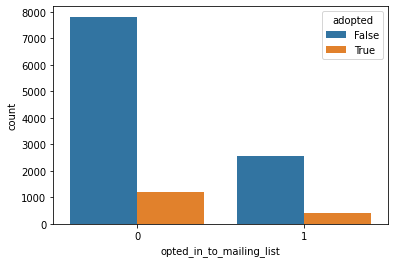

In [16]:
sns.countplot(x = 'opted_in_to_mailing_list', hue='adopted', data= users)

<AxesSubplot:xlabel='enabled_for_marketing_drip', ylabel='count'>

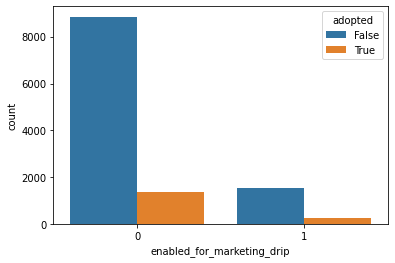

In [17]:
sns.countplot(x = 'enabled_for_marketing_drip', hue='adopted', data= users)

In [18]:
users[users.opted_in_to_mailing_list ==1]['adopted'].value_counts(normalize= True)

False    0.861723
True     0.138277
Name: adopted, dtype: float64

In [19]:
users[users.opted_in_to_mailing_list ==0]['adopted'].value_counts(normalize= True)

False    0.868088
True     0.131912
Name: adopted, dtype: float64

In [20]:
users[users.enabled_for_marketing_drip ==1]['adopted'].value_counts(normalize= True)

False    0.862723
True     0.137277
Name: adopted, dtype: float64

In [21]:
users[users.enabled_for_marketing_drip ==0]['adopted'].value_counts(normalize= True)

False    0.867163
True     0.132837
Name: adopted, dtype: float64

In [22]:
users['invited_by_user_id'].value_counts()

10741.0    13
2527.0     12
2308.0     11
1525.0     11
11770.0    11
           ..
2746.0      1
10456.0     1
8371.0      1
6266.0      1
3572.0      1
Name: invited_by_user_id, Length: 2564, dtype: int64

In [23]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adopted                     12000 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 949.3+ KB


In [24]:
users.invited_by_user_id = users.invited_by_user_id.fillna(0)

In [25]:
users.invited_by_user_id = users.invited_by_user_id.astype('int')

In [26]:
users['invited'] = np.where(users.invited_by_user_id != 0, True, False)

In [27]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803,False,True
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316,True,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525,False,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151,False,True
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240,False,True


In [28]:
users[users.invited == True]['adopted'].value_counts(normalize= True)

False    0.857722
True     0.142278
Name: adopted, dtype: float64

In [29]:
users[users.invited == False]['adopted'].value_counts(normalize= True)

False    0.87659
True     0.12341
Name: adopted, dtype: float64

In [30]:
users['adopted'].value_counts(normalize=True)

False    0.8665
True     0.1335
Name: adopted, dtype: float64

In [31]:
users.org_id.value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
400      8
397      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [32]:
by_creation = {}
for source in users.creation_source.unique():
    by_creation[source] = users[users.creation_source == source]['adopted'].value_counts(normalize=True)[True]

In [33]:
by_creation

{'GUEST_INVITE': 0.1664355062413315,
 'ORG_INVITE': 0.12999529854254818,
 'SIGNUP': 0.1403929084810733,
 'PERSONAL_PROJECTS': 0.07768829938417811,
 'SIGNUP_GOOGLE_AUTH': 0.16750902527075812}

In [34]:
users.head(100)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803,False,True
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316,True,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525,False,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151,False,True
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2014-03-12 00:33:22,Bach Mohamed,MohamedFBach@gmail.com,ORG_INVITE,1.395708e+09,0,0,130,451,False,True
96,97,2013-10-02 20:29:41,Hill Samuel,SamuelJHill@gmail.com,SIGNUP_GOOGLE_AUTH,1.380746e+09,0,0,3,0,False,False
97,98,2014-05-13 15:52:03,Charles Benjamin,BenjaminCharles@jourrapide.com,ORG_INVITE,1.399996e+09,0,0,196,6529,False,True
98,99,2012-09-26 23:27:02,Lauritsen Mark,MarkALauritsen@yahoo.com,ORG_INVITE,1.349048e+09,0,1,335,1261,False,True


In [35]:
users.name.value_counts().value_counts()

1    10794
2      490
3       60
4        9
5        2
Name: name, dtype: int64

In [36]:
users['inviter_tot_invites']= users.groupby('invited_by_user_id')['object_id'].transform('count')

In [37]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,invited,inviter_tot_invites
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803,False,True,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316,True,True,3
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525,False,True,11
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151,False,True,7
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240,False,True,5


In [38]:
users.invited_by_user_id.value_counts().value_counts()

1       1097
2        527
3        347
4        205
5        165
6         98
7         60
8         36
9         14
10        10
11         3
5583       1
13         1
12         1
Name: invited_by_user_id, dtype: int64

In [39]:
users.inviter_tot_invites= users.apply(lambda x: 0 if x['invited_by_user_id']==0 else x['inviter_tot_invites'], axis=1)

In [40]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,invited,inviter_tot_invites
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803,False,True,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316,True,True,3
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525,False,True,11
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151,False,True,7
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240,False,True,5


In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
pd.get_dummies(users)

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,invited,inviter_tot_invites,creation_time_2012-05-31 00:43:27,...,email_zvgswfkk@utjmk.com,email_zwicjnqn@ruynp.com,email_zxswdasp@swhrr.com,email_zyxoffkk@vxdvt.com,email_zzxqnoiy@vhugu.com,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,1.398139e+09,1,0,11,10803,False,True,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1.396238e+09,0,0,1,316,True,True,3,0,...,0,0,0,0,0,0,1,0,0,0
2,3,1.363735e+09,0,0,94,1525,False,True,11,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1.369210e+09,0,0,1,5151,False,True,7,0,...,0,0,0,0,0,1,0,0,0,0
4,5,1.358850e+09,0,0,193,5240,False,True,5,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,1.378448e+09,0,0,89,8263,False,True,7,0,...,0,0,0,0,0,0,1,0,0,0
11996,11997,1.358275e+09,0,0,200,0,False,False,0,0,...,0,0,0,0,0,0,0,0,0,1
11997,11998,1.398603e+09,1,1,83,8074,False,True,5,0,...,0,0,0,0,0,1,0,0,0,0
11998,11999,1.338638e+09,0,0,6,0,False,False,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
users = pd.get_dummies(users, columns=['creation_source'])

In [44]:
users.head()

,object_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,invited,inviter_tot_invites,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1.398139e+09,1,0,11,10803,False,True,1,1,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1.396238e+09,0,0,1,316,True,True,3,0,1,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1.363735e+09,0,0,94,1525,False,True,11,0,1,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1.369210e+09,0,0,1,5151,False,True,7,1,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1.358850e+09,0,0,193,5240,False,True,5,1,0,0,0,0


In [45]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   object_id                           12000 non-null  int64  
 1   creation_time                       12000 non-null  object 
 2   name                                12000 non-null  object 
 3   email                               12000 non-null  object 
 4   last_session_creation_time          8823 non-null   float64
 5   opted_in_to_mailing_list            12000 non-null  int64  
 6   enabled_for_marketing_drip          12000 non-null  int64  
 7   org_id                              12000 non-null  int64  
 8   invited_by_user_id                  12000 non-null  int64  
 9   adopted                             12000 non-null  bool   
 10  invited                             12000 non-null  bool   
 11  inviter_tot_invites                 12000

In [46]:
users.adopted = users.adopted*1
users.invited = users.invited*1

In [47]:
X = users[['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'invited', 'inviter_tot_invites',
          'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS',
          'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH']]
y = users['adopted']

In [48]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .3)

In [53]:
tree = DecisionTreeClassifier(max_depth=5)

In [54]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [55]:
tree.score(X_test, y_test)

0.8683333333333333

In [63]:
from sklearn.tree import plot_tree, export_text

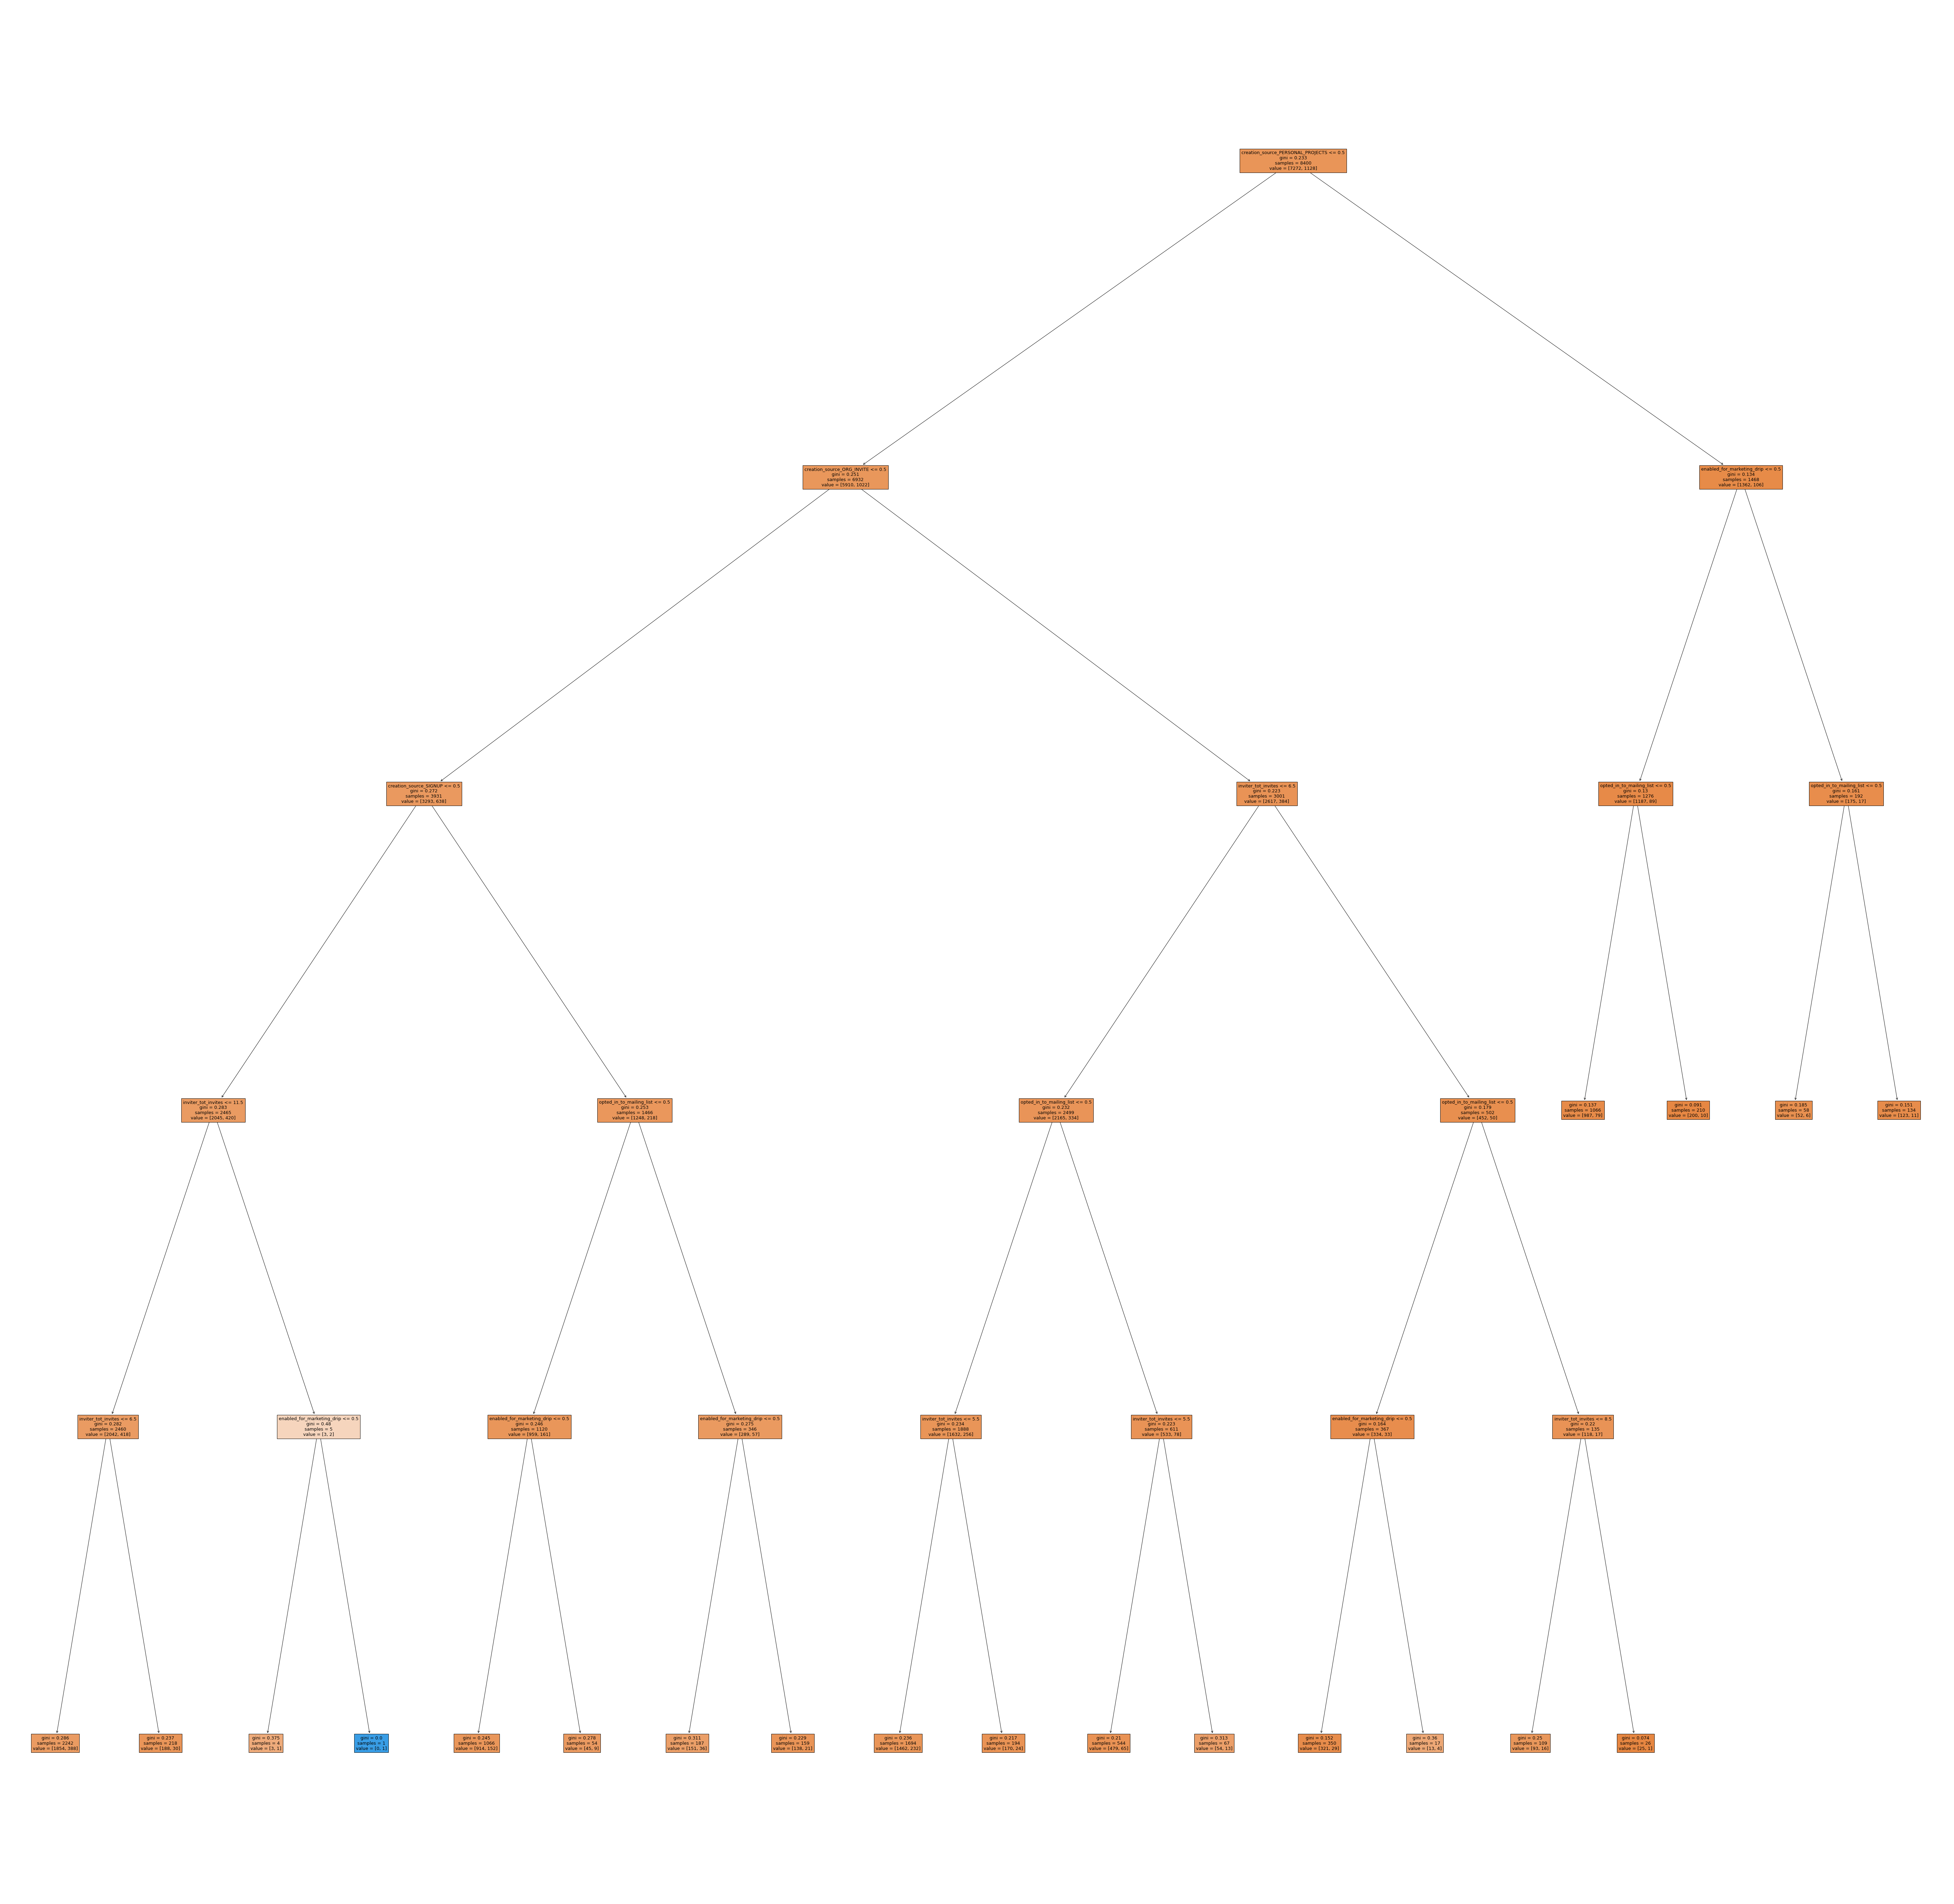

In [80]:
fig = plt.figure(figsize=(100,100))
_ = plot_tree(tree, 
                   feature_names=X.columns,  
                   filled=True)

In [78]:
text_representation = export_text(tree, feature_names = X.columns)

ValueError: The truth value of a Index is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [79]:
print(text_representation)

|--- feature_6 <= 0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_7 <= 0.50
|   |   |   |--- feature_3 <= 11.50
|   |   |   |   |--- feature_3 <= 6.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  6.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  11.50
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_7 >  0.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  0.50
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |--- class: 0
|   |--- feature_5 >  0.50
|   |   |--- feature_3 <= 6.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- feature_3 <= 5.50
|   |   |   |   |   |--- class

In [66]:
tree.feature_importances_

array([0.03308285, 0.0979891 , 0.        , 0.12807683, 0.        ,
       0.15998135, 0.54642506, 0.0344448 , 0.        ])

In [67]:
for name, importance in zip(X.columns, tree.feature_importances_):
    print(name, importance)

opted_in_to_mailing_list 0.03308285048533427
enabled_for_marketing_drip 0.09798910374965367
invited 0.0
inviter_tot_invites 0.1280768314775966
creation_source_GUEST_INVITE 0.0
creation_source_ORG_INVITE 0.15998135398261867
creation_source_PERSONAL_PROJECTS 0.5464250623728854
creation_source_SIGNUP 0.034444797931911325
creation_source_SIGNUP_GOOGLE_AUTH 0.0


<AxesSubplot:xlabel='creation_source_PERSONAL_PROJECTS', ylabel='count'>

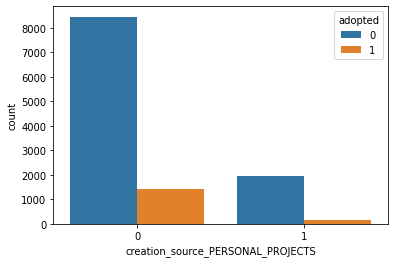

In [68]:
sns.countplot(x = 'creation_source_PERSONAL_PROJECTS', hue='adopted', data= users)

In [69]:
users[users.creation_source_PERSONAL_PROJECTS ==1]['adopted'].value_counts(normalize= True)

0    0.922312
1    0.077688
Name: adopted, dtype: float64

In [70]:
users[users.creation_source_PERSONAL_PROJECTS ==0]['adopted'].value_counts(normalize= True)

0    0.854586
1    0.145414
Name: adopted, dtype: float64

In [76]:
users[users.inviter_tot_invites > 10]['adopted'].value_counts(normalize= True)

0    0.913793
1    0.086207
Name: adopted, dtype: float64

In [77]:
users[users.inviter_tot_invites <= 10]['adopted'].value_counts(normalize= True)

0    0.86627
1    0.13373
Name: adopted, dtype: float64

In [81]:
users[users.creation_source_ORG_INVITE ==1]['adopted'].value_counts(normalize= True)

0    0.870005
1    0.129995
Name: adopted, dtype: float64

In [82]:
users[users.creation_source_ORG_INVITE ==0]['adopted'].value_counts(normalize= True)

0    0.864575
1    0.135425
Name: adopted, dtype: float64

In [84]:
tree3 = DecisionTreeClassifier(max_depth=3)

In [85]:
tree3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [86]:
tree3.score(X_test, y_test)

0.8683333333333333

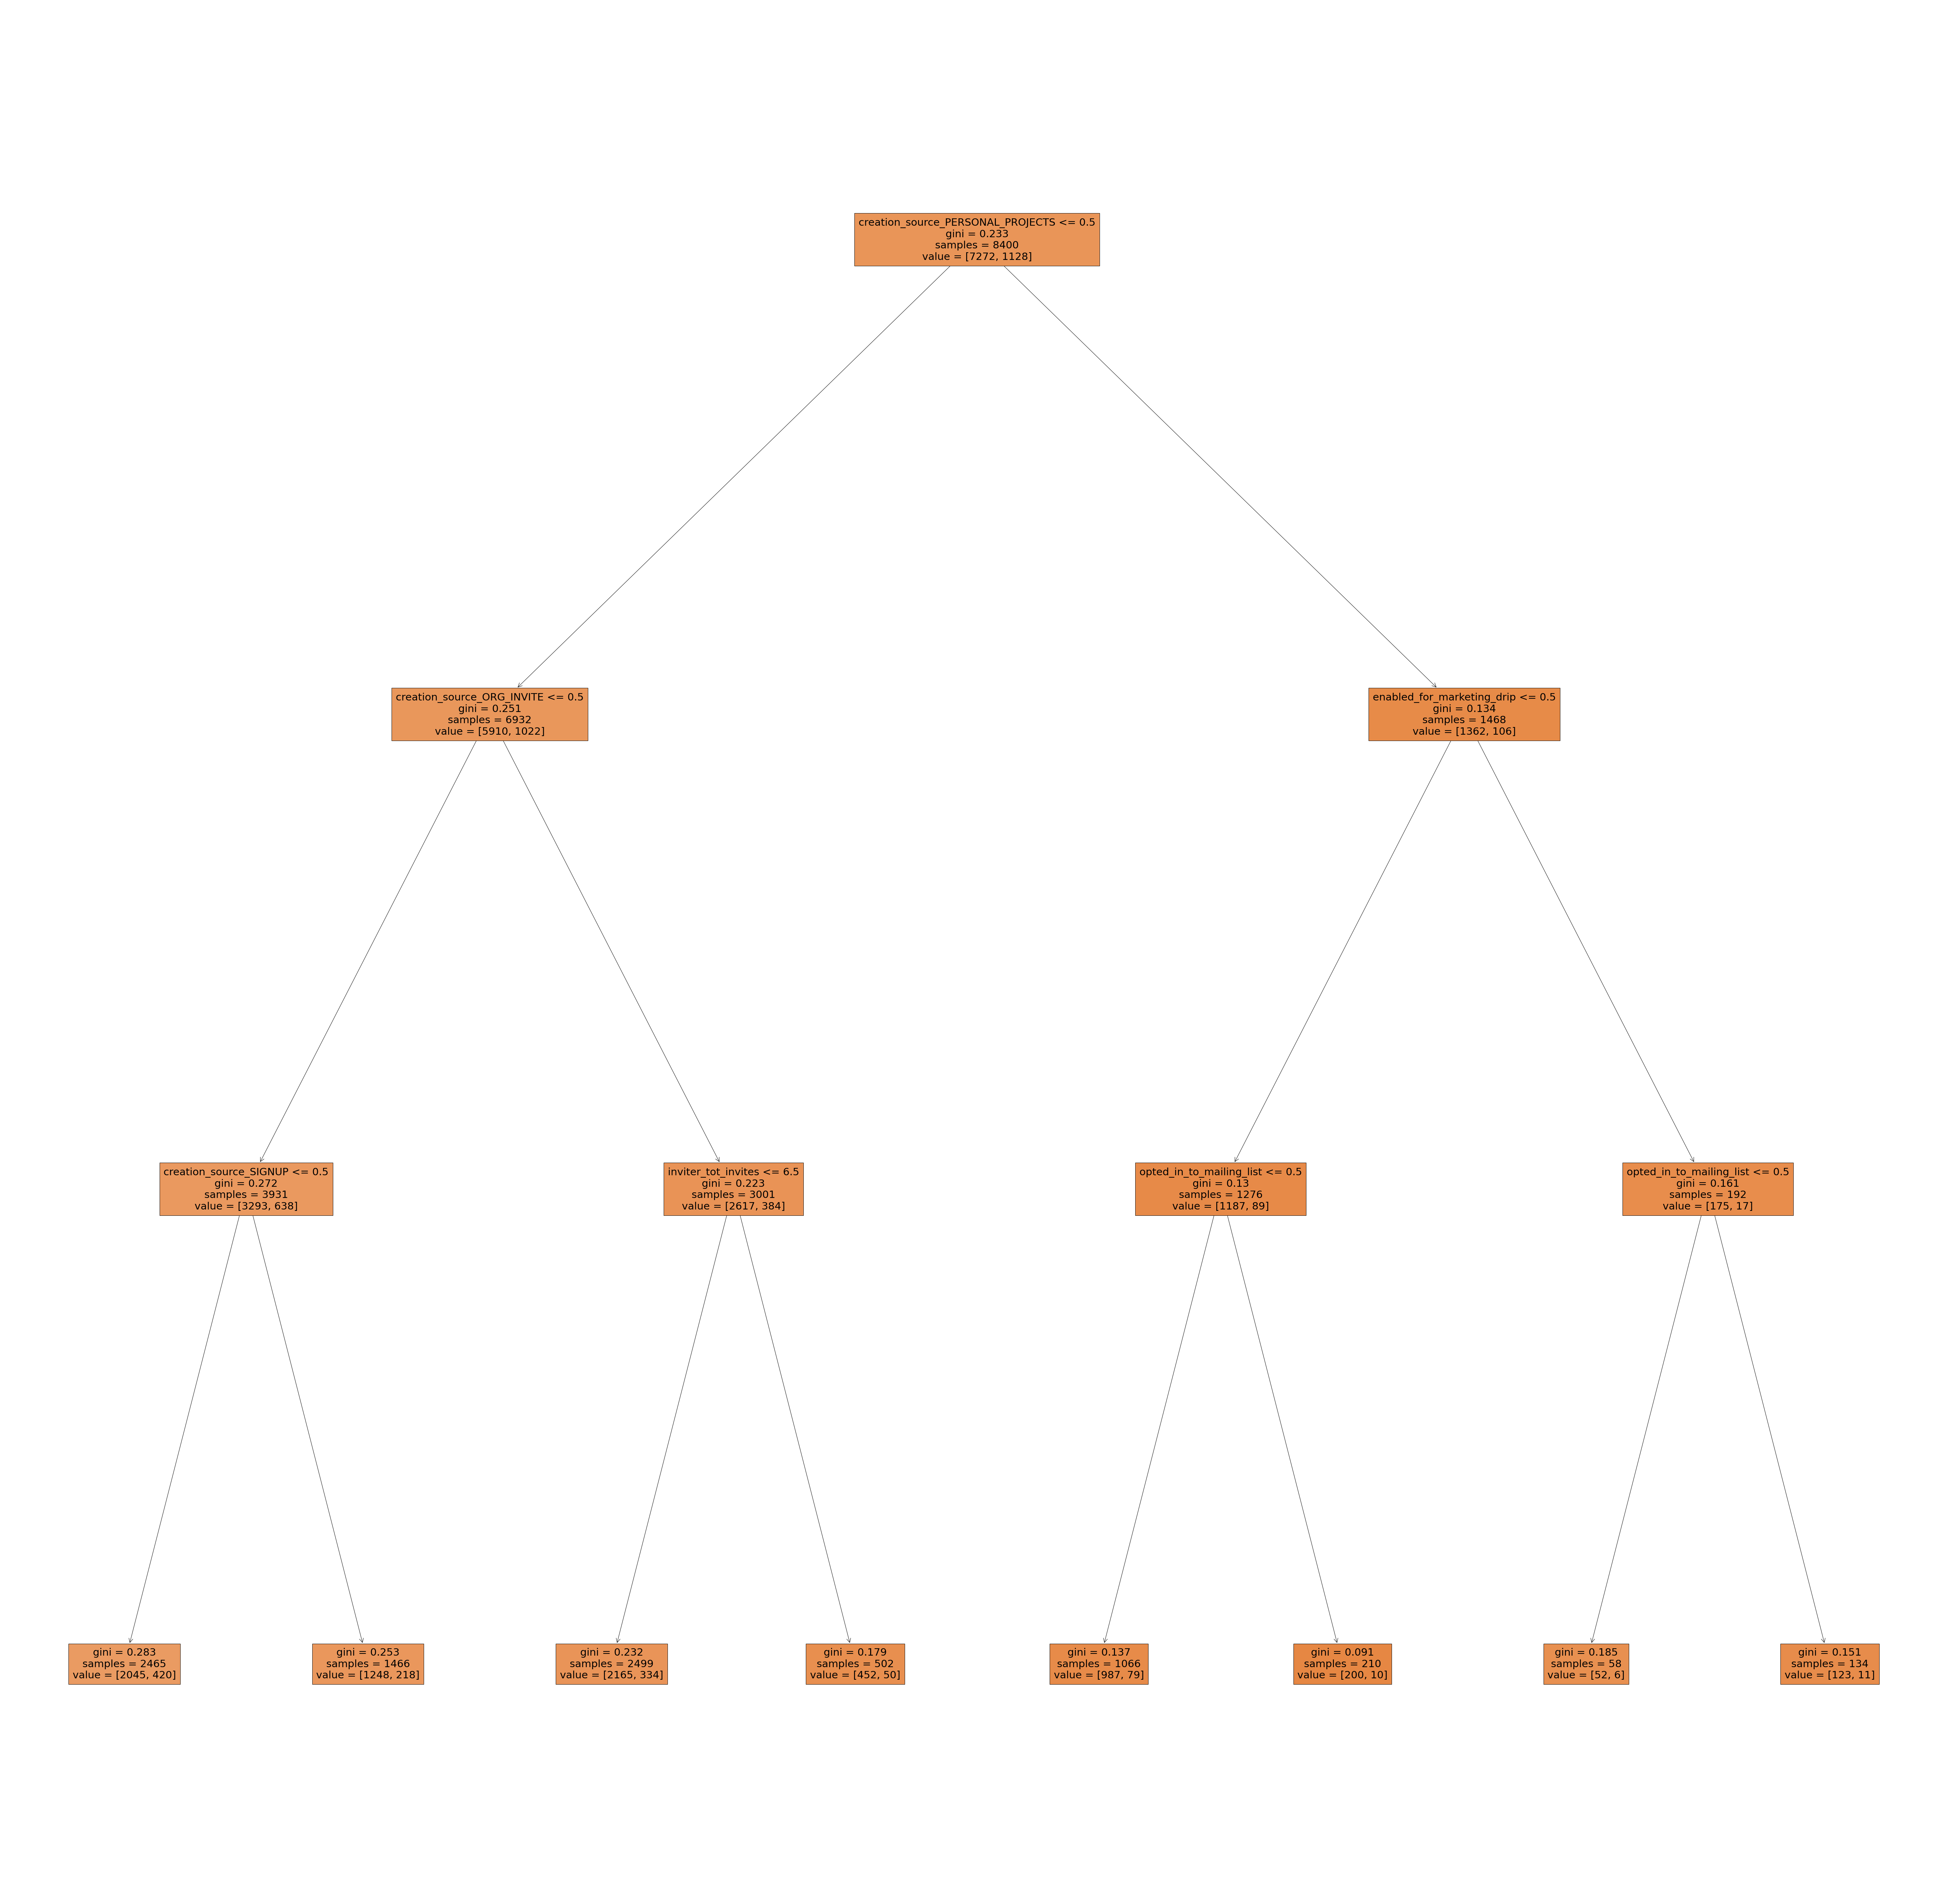

In [87]:
fig = plt.figure(figsize=(100,100))
_ = plot_tree(tree3, 
                   feature_names=X.columns,  
                   filled=True)

In [88]:
users['adopted'].value_counts(normalize= True)

0    0.8665
1    0.1335
Name: adopted, dtype: float64